# ISSUES:
- really bad error rate
- maybe multiple nns?

TODO:
- clean data (make data cleaner work)
- create multilabel dataset with single label nn?


In [11]:
!pip install torch --upgrade
!pip install torchvision --upgrade
!pip install fastai --upgrade

In [12]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [14]:
# import libraries
import torch
import torchvision
import fastai
from fastai.vision.all import *
import os

In [15]:
fastai.__version__

'2.5.2'

# From Data to Dataloaders
find all images (paths)

In [3]:
filepath = r'/content/gdrive/MyDrive/TechlabsProject/GitHub/NutritionTracker/Training_Data'
files = get_image_files(filepath)
print(f'there are {len(files)} training files')

there are 10738 training files


## check for wrong images

sort out not verifyable images


In [ ]:
import itertools
files_it = iter(files)
failed_total = []
failed_batch = 500
for j in range(int(len(files)/failed_batch)):
  sublist = []
  for i in range(failed_batch):
    sublist.append(next(files_it))

  failed = verify_images(sublist)
  failed.map(Path.unlink)
  failed_total = failed_total + failed
  print( j, failed_total)

0 []


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


1 []


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


2 []
3 []
4 []
5 []
6 []
7 []
8 []


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


9 [Path('/content/gdrive/MyDrive/TechlabsProject/GitHub/NutritionTracker/Training_Data/Food_Categories/Meat/Ham/00000085.jpg')]
10 [Path('/content/gdrive/MyDrive/TechlabsProject/GitHub/NutritionTracker/Training_Data/Food_Categories/Meat/Ham/00000085.jpg'), Path('/content/gdrive/MyDrive/TechlabsProject/GitHub/NutritionTracker/Training_Data/Food_Categories/Cereals_grains/Mais/00000091.jpg')]
11 [Path('/content/gdrive/MyDrive/TechlabsProject/GitHub/NutritionTracker/Training_Data/Food_Categories/Meat/Ham/00000085.jpg'), Path('/content/gdrive/MyDrive/TechlabsProject/GitHub/NutritionTracker/Training_Data/Food_Categories/Cereals_grains/Mais/00000091.jpg')]
12 [Path('/content/gdrive/MyDrive/TechlabsProject/GitHub/NutritionTracker/Training_Data/Food_Categories/Meat/Ham/00000085.jpg'), Path('/content/gdrive/MyDrive/TechlabsProject/GitHub/NutritionTracker/Training_Data/Food_Categories/Cereals_grains/Mais/00000091.jpg'), Path('/content/gdrive/MyDrive/TechlabsProject/GitHub/NutritionTracker/Trainin

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 7436 bytes but only got 7408. Skipping tag 37500
  " Skipping tag %s" % (size, len(data), tag)


14 [Path('/content/gdrive/MyDrive/TechlabsProject/GitHub/NutritionTracker/Training_Data/Food_Categories/Meat/Ham/00000085.jpg'), Path('/content/gdrive/MyDrive/TechlabsProject/GitHub/NutritionTracker/Training_Data/Food_Categories/Cereals_grains/Mais/00000091.jpg'), Path('/content/gdrive/MyDrive/TechlabsProject/GitHub/NutritionTracker/Training_Data/Food_Categories/Nuts_Seeds/Walnut/00000105.jpg'), Path('/content/gdrive/MyDrive/TechlabsProject/GitHub/NutritionTracker/Training_Data/Food_Categories/Nuts_Seeds/Almond/00000140.jpg'), Path('/content/gdrive/MyDrive/TechlabsProject/GitHub/NutritionTracker/Training_Data/Food_Categories/Nuts_Seeds/Macadamia/00000108.jpg'), Path('/content/gdrive/MyDrive/TechlabsProject/GitHub/NutritionTracker/Training_Data/Food_Categories/Nuts_Seeds/Macadamia/00000147.jpg'), Path('/content/gdrive/MyDrive/TechlabsProject/GitHub/NutritionTracker/Training_Data/Food_Categories/Nuts_Seeds/Cashew/00000067.png'), Path('/content/gdrive/MyDrive/TechlabsProject/GitHub/Nutrit

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


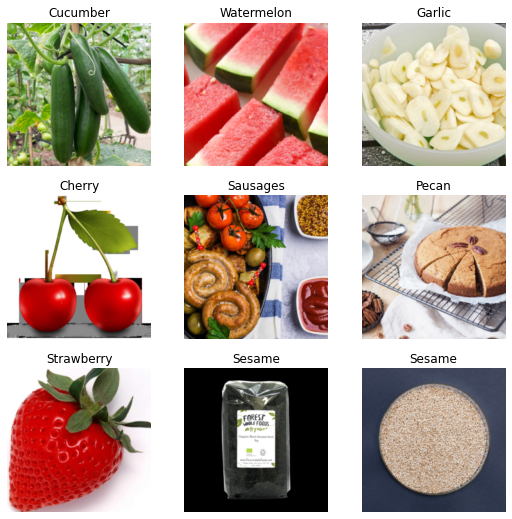

In [5]:
dls = ImageDataLoaders.from_folder(filepath, files, valid_pct=.2, seed=42, item_tfms=Resize(224))
dls.show_batch()

In [6]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

In [16]:
learn = learn.load('/content/gdrive/MyDrive/TechlabsProject/GitHub/NutritionTracker/food_nn_ep10')
learn.unfreeze()

In [17]:
already_learned_ep = 10
ep = 2
learn.fine_tune(ep)
learnpath = '/content/gdrive/MyDrive/TechlabsProject/GitHub/NutritionTracker'
learn_savename = f'/food_nn_ep{ep + already_learned_ep}'
learn.save(os.path.join(learnpath, learn_savename))


epoch,train_loss,valid_loss,error_rate,time
0,0.351135,0.806486,0.166744,23:52


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  

epoch,train_loss,valid_loss,error_rate,time
0,0.451014,0.967849,0.197485,08:48
1,0.251327,0.885415,0.182580,08:53


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes sh

Path('/food_nn_ep12.pth')

In [9]:
print(len(dls.vocab), dls.vocab)

55 ['Almond', 'Apple', 'Apricot', 'Asparagus', 'Banana', 'Blueberry', 'Brokkoli', 'Carrots', 'Cashew', 'Cherry', 'Chicken', 'Cucumber', 'DL_Asparagus', 'DL_Brokkoli', 'DL_Carrots', 'DL_Cucumber', 'Garlic', 'Green beans', 'Hafer', 'Ham', 'Hazelnut', 'Herring', 'Linseed', 'Macadamia', 'Mais', 'Onions', 'Peach', 'Peanut', 'Pear', 'Pecan', 'Pumpkin', 'Pumpkinseed', 'Raspberry', 'Rice', 'Salmon', 'Sardine', 'Sausages', 'Sesame', 'Shrimps', 'Spinach', 'Strawberry', 'Tomatoes', 'Trout', 'Walnut', 'Watermelon', 'bacon', 'baguette', 'beef steak', 'brot', 'chiaseed', 'körner brötchen', 'lenses', 'normale brötchen', 'sunflower seeds', 'toastbrot']


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 7436 bytes but only got 7408. Skipping tag 37500
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


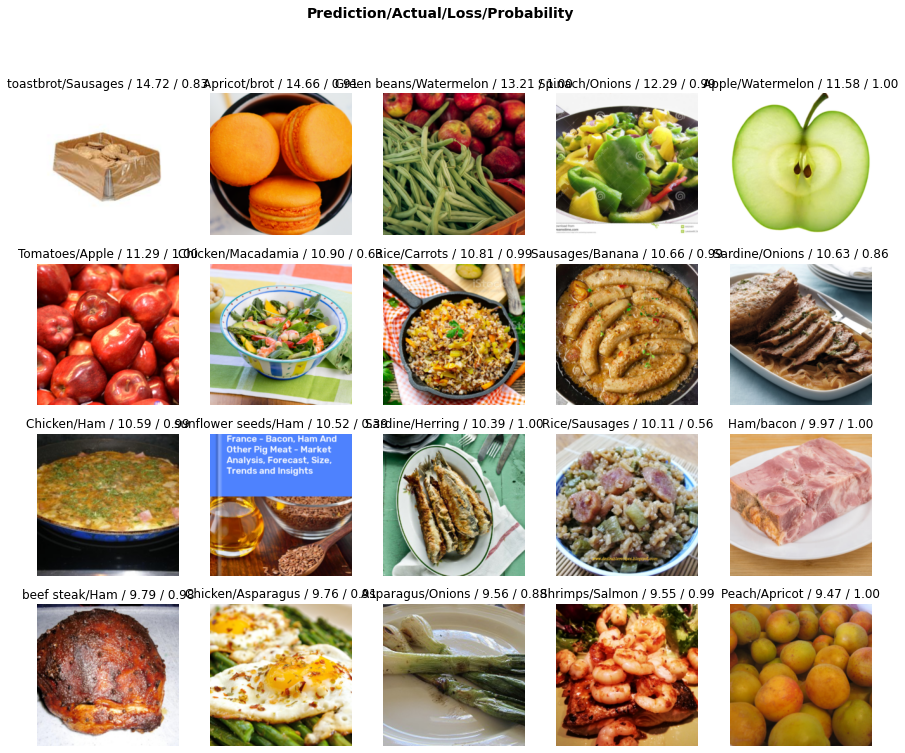

In [18]:
interp = ClassificationInterpretation.from_learner(learn)
# interp.plot_confusion_matrix()
interp.plot_top_losses(20)

In [ ]:
# cleaner = ImageClassifierCleaner(learn)
# cleaner

NameError: ignored